In [2]:
import kan
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
import numpy.random as npr
import qutip as qt

In [3]:
def J1J2_hamiltonian(N, j1, j2):
    id = qt.qeye(2)
    x = qt.sigmax()
    y = qt.sigmay()
    z = qt.sigmaz()
    sxi = []; syi = []; szi = []
    for i in range(N):
        sxi.append(qt.tensor([id] * i + [x] + [id] * (N - i - 1)))
        syi.append(qt.tensor([id] * i + [y] + [id] * (N - i - 1)))
        szi.append(qt.tensor([id] * i + [z] + [id] * (N - i - 1)))
    sis = [sxi, syi, szi]
    J1_term = j1 * (sum(sis[coord][i] * sis[coord][i + 1] for coord in range(len(sis)) for i in range(N - 1)) + sum(sis[coord][N - 1] * sis[coord][0] for coord in range(len(sis))))
    J2_term = j2 * (sum(sis[coord][i] * sis[coord][i + 2] for coord in range(len(sis)) for i in range(N - 2)) + sum(sis[coord][N - 2] * sis[coord][0] for coord in range(len(sis))) + sum(sis[coord][N - 1] * sis[coord][1] for coord in range(len(sis))))
    return J1_term + J2_term

In [9]:
J1J2_hamiltonian(8, 1, 0).eigenstates()[0]

array([-1.46043736e+01, -1.25136763e+01, -1.25136763e+01, -1.25136763e+01,
       -1.07985126e+01, -9.83495404e+00, -9.83495404e+00, -9.83495404e+00,
       -9.83495404e+00, -9.83495404e+00, -9.83495404e+00, -8.58059350e+00,
       -8.58059350e+00, -8.58059350e+00, -8.58059350e+00, -8.58059350e+00,
       -8.58059350e+00, -7.41855072e+00, -7.41855072e+00, -7.41855072e+00,
       -7.41855072e+00, -7.41855072e+00, -7.41855072e+00, -7.20775094e+00,
       -7.20775094e+00, -7.20775094e+00, -7.20775094e+00, -7.20775094e+00,
       -6.82842712e+00, -6.82842712e+00, -6.47213595e+00, -6.47213595e+00,
       -5.06814039e+00, -5.06814039e+00, -5.06814039e+00, -5.06814039e+00,
       -5.06814039e+00, -5.06814039e+00, -5.06814039e+00, -5.06814039e+00,
       -5.06814039e+00, -5.06814039e+00, -4.80655870e+00, -4.80655870e+00,
       -4.80655870e+00, -4.57649122e+00, -4.57649122e+00, -4.57649122e+00,
       -4.57649122e+00, -4.57649122e+00, -4.57649122e+00, -4.57649122e+00,
       -4.57649122e+00, -

In [4]:
def count_half_magnetization(state, odd=False): 
    """
    Counts number of 1s in binary representation of some integer
    With integer encoding of state such that 1 in binary representation 
    is spin down and 0 is spin up. Returns number of spin downs.
    """
    if state == 0: return 0
    return sum((state >> n) & 1 for n in range(odd, int(np.log2(state)) + 1, 2))

In [5]:
N = 9

In [6]:
eigs9 = J1J2_hamiltonian(N, 1, 0).eigenstates()
print(eigs9[0])

[-15.18919914 -15.18919914 -15.18919914 -15.18919914 -11.74456265
 -11.74456265 -11.74456265 -11.74456265 -11.74456265 -11.74456265
 -11.74456265 -11.74456265 -11.41599164 -11.41599164 -11.41599164
 -11.41599164  -9.92820323  -9.92820323  -9.62099873  -9.62099873
  -9.62099873  -9.62099873  -9.10494651  -9.10494651  -9.10494651
  -9.10494651  -9.10494651  -9.10494651  -9.10494651  -9.10494651
  -8.35605157  -8.35605157  -8.35605157  -8.35605157  -8.35605157
  -8.35605157  -8.35605157  -8.35605157  -7.87329483  -7.87329483
  -7.87329483  -7.87329483  -7.50683608  -7.50683608  -7.50683608
  -7.50683608  -7.50683608  -7.50683608  -7.50683608  -7.50683608
  -7.28396477  -7.28396477  -7.28396477  -7.28396477  -6.58443726
  -6.58443726  -6.58443726  -6.58443726  -6.58443726  -6.58443726
  -6.58443726  -6.58443726  -6.02422274  -6.02422274  -6.02422274
  -6.02422274  -5.94082798  -5.94082798  -5.94082798  -5.94082798
  -5.94082798  -5.94082798  -5.94082798  -5.94082798  -5.94082798
  -5.94082

In [22]:
for i in range(0, 2 ** N):
    print(bin(i), round(eigs9[1][0][i][0], 5))

0b0 0j
0b1 0j
0b10 0j
0b11 0j
0b100 0j
0b101 (-0+0j)
0b110 (-0+0j)
0b111 (-0+0j)
0b1000 (-0+0j)
0b1001 0j
0b1010 (-0+0j)
0b1011 (-0+0j)
0b1100 (-0+0j)
0b1101 0j
0b1110 0j
0b1111 0j
0b10000 (-0+0j)
0b10001 (-0+0j)
0b10010 0j
0b10011 0j
0b10100 0j
0b10101 (-0+0j)
0b10110 (-0+0j)
0b10111 (-2e-05+0j)
0b11000 0j
0b11001 0j
0b11010 (-0+0j)
0b11011 (9e-05+0j)
0b11100 (-0+0j)
0b11101 (-7e-05+0j)
0b11110 (2e-05+0j)
0b11111 (-0.0018+0j)
0b100000 0j
0b100001 0j
0b100010 (-0+0j)
0b100011 (-0+0j)
0b100100 0j
0b100101 (-0+0j)
0b100110 (-0+0j)
0b100111 (0.00011+0j)
0b101000 0j
0b101001 0j
0b101010 0j
0b101011 (-0.00043+0j)
0b101100 (-0+0j)
0b101101 (0.00038+0j)
0b101110 (-8e-05+0j)
0b101111 (0.01319+0j)
0b110000 0j
0b110001 0j
0b110010 0j
0b110011 (0.0003+0j)
0b110100 (-0+0j)
0b110101 (-0.00051+0j)
0b110110 (0.00012+0j)
0b110111 (-0.03287+0j)
0b111000 0j
0b111001 (0.00014+0j)
0b111010 (-5e-05+0j)
0b111011 (0.03411+0j)
0b111100 (1e-05+0j)
0b111101 (-0.01488+0j)
0b111110 (0.00225+0j)
0b111111 0j
0b1000

C:\Users\taoha\AppData\Local\Temp\ipykernel_7024\231577924.py:2: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print(bin(i), round(eigs9[1][0][i][0], 5))


In [ ]:
for num in range(4):
    print(num)
    states = []
    signs = []
    for i in range(0, 2 ** N):
        val = eigs9[1][num][i][0].real
        if abs(val) > 1e-10: # the correct threshold to use is sort of weird
            states.append(i)
            signs.append(-1 + 2 * int(val > 0))
    pred_signs =  [-1 + 2 * (count_half_magnetization(i) % 2) for i in states]
    print(len(states))
    # for state, true, calc in zip(states, signs, pred_signs):
    #     if true != calc:
    #         print(f'fail {bin(state)}, val {eigs9[1][num][state][0].real}, pred {calc}')
    # print('success')
# all fail the sign rule no matter how you look at it it seems
# all have 252 non-zero entries which is same as N=10


0
252
1
252
2
252
3
252


In [25]:
# try the first GS
gs_num = 0
states = []
signs = []
for i in range(0, 2 ** N):
    val = eigs9[1][gs_num][i][0].real
    if abs(val) > 1e-10: # the correct threshold to use is sort of weird
        states.append(i)
        signs.append(-1 + 2 * int(val > 0))
print(len(states))


252


In [27]:
sampled_input = utils.generate_input_samples(N, states)
sampled_labels = torch.tensor(signs).reshape((-1, 1))
print(sampled_input.shape, sampled_labels.shape)
dataset = {'train_input':sampled_input, 'train_label':sampled_labels, 'test_input':sampled_input, 'test_label': sampled_labels}

torch.Size([252, 9]) torch.Size([252, 1])


In [57]:
sampling_kan = kan.KAN(width = [N, 2*N, 1])
sampling_kan(dataset['train_input']);

checkpoint directory created: ./model
saving model version 0.0


In [58]:
sampling_kan.fit(dataset, opt = 'LBFGS', steps=50, lamb=0);

| train_loss: 5.99e-02 | test_loss: 5.99e-02 | reg: 7.33e+01 | : 100%|█| 50/50 [00:10<00:00,  4.56it

saving model version 0.1


saving model version 0.2


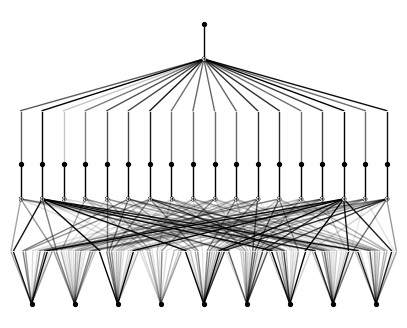

In [63]:
sampling_kan = sampling_kan.prune()
sampling_kan.plot()

In [38]:
sampling_kan.suggest_symbolic(1, 0, 0);
sampling_kan.suggest_symbolic(1, 1, 0);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.285317 -0.484605           1                1    0.703079
2      exp    0.887745 -3.155026           2                2    0.968995
3      x^2    0.882745 -3.092154           2                2    0.981569
4      cos    0.882638 -3.090843           2                2    0.981831
  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1        x    0.286061 -0.486107           1                1    0.702779
2      x^2    0.895310 -3.255671           2                2    0.948866
3      sin    0.895156 -3.253549           2                2    0.949290
4      cos    0.895052 -3.252114           2                2    0.949577


In [39]:
sampling_kan.fix_symbolic(1, 0, 0, 'sin')
sampling_kan.fix_symbolic(1, 1, 0, 'sin')
for i in range(N):
    sampling_kan.fix_symbolic(0, i, 0, 'x')
    sampling_kan.fix_symbolic(0, i, 1, 'x')

r2 is 0.8826265931129456
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.3
r2 is 0.89515620470047
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.4
r2 is 1.0000009536743164
saving model version 0.5
r2 is 1.0000008344650269
saving model version 0.6
r2 is 1.0000009536743164
saving model version 0.7
r2 is 1.0000009536743164
saving model version 0.8
r2 is 1.0000011920928955
saving model version 0.9
r2 is 1.000001311302185
saving model version 0.10
r2 is 1.0000004768371582
saving model version 0.11
r2 is 0.9999996423721313
saving model version 0.12
r2 is 1.0000008344650269
saving model version 0.13
r2 is 1.000001311302185
saving model version 0.14
r2 is 1.0000008344650269
saving model version 0.15
r2 is 1.000001072883606
saving model version 0.16
r2 is 1.000001311302185
saving model version 0.17
r2 is 1.000001311302185
saving model version 0.18
r2 is 1.000001

In [56]:
sampling_kan.fit(dataset, opt = 'LBFGS', steps = 50);

| train_loss: 1.14e-01 | test_loss: 1.14e-01 | reg: 6.98e+01 | : 100%|█| 50/50 [00:11<00:00,  4.22it

saving model version 0.3


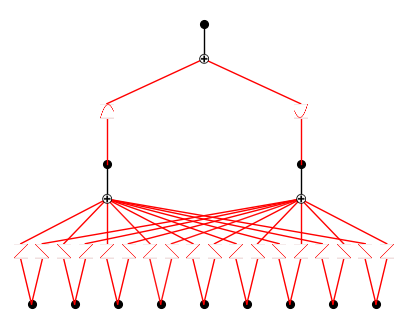

In [41]:
sampling_kan.plot()

In [59]:
sampled_labels

tensor([[ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
      

In [61]:
pred = sampling_kan(sampled_input)
pred

tensor([[ 0.9345],
        [-1.0866],
        [ 1.1129],
        [-1.0030],
        [ 1.0961],
        [-1.0176],
        [ 1.0183],
        [-1.0456],
        [ 0.9786],
        [-0.9627],
        [ 1.0783],
        [ 0.9944],
        [-1.0390],
        [ 1.0143],
        [-0.9679],
        [ 0.9428],
        [-1.0714],
        [ 1.0592],
        [ 0.9707],
        [-0.9613],
        [ 1.0011],
        [-0.9013],
        [ 0.9640],
        [-0.9962],
        [ 0.8889],
        [-0.9964],
        [-0.9814],
        [ 1.0774],
        [-0.9973],
        [ 0.9991],
        [-0.9856],
        [ 0.9355],
        [-1.0472],
        [-0.9755],
        [ 0.9696],
        [-0.9987],
        [ 1.0878],
        [-1.0428],
        [ 1.0628],
        [-1.0671],
        [ 1.0031],
        [ 1.0025],
        [ 1.0731],
        [-1.1409],
        [-0.9178],
        [ 1.0060],
        [-0.9618],
        [-1.0259],
        [-0.9816],
        [ 0.9962],
        [ 1.0403],
        [ 1.0212],
        [-0.

In [62]:
count = 0
for i in range(len(states)):
    if sampled_labels[i][0] * pred[i][0] > 0:
        count += 1
print(count)
print(count / len(states))

252
1.0


In [97]:
smaller_kan = kan.KAN(width = [N, 3, 1])
smaller_kan(dataset['train_input']);

checkpoint directory created: ./model
saving model version 0.0


In [98]:
smaller_kan.fit(dataset, opt = 'LBFGS', steps = 50, lamb=0)

| train_loss: 5.83e-01 | test_loss: 5.83e-01 | reg: 6.05e+01 | : 100%|█| 50/50 [00:05<00:00,  8.55it

saving model version 0.1


{'train_loss': [array(0.57544684, dtype=float32),
  array(0.4466819, dtype=float32),
  array(0.39204735, dtype=float32),
  array(0.29578987, dtype=float32),
  array(0.28944665, dtype=float32),
  array(0.7280207, dtype=float32),
  array(0.6750501, dtype=float32),
  array(0.4869309, dtype=float32),
  array(0.3870582, dtype=float32),
  array(0.3546209, dtype=float32),
  array(0.6084512, dtype=float32),
  array(0.5938237, dtype=float32),
  array(0.54820067, dtype=float32),
  array(0.46263447, dtype=float32),
  array(0.41985095, dtype=float32),
  array(0.6466877, dtype=float32),
  array(0.57154626, dtype=float32),
  array(0.49589807, dtype=float32),
  array(0.47874242, dtype=float32),
  array(0.46985444, dtype=float32),
  array(0.8747772, dtype=float32),
  array(0.7051883, dtype=float32),
  array(0.59628785, dtype=float32),
  array(0.56005573, dtype=float32),
  array(0.5426243, dtype=float32),
  array(0.6255763, dtype=float32),
  array(0.5934897, dtype=float32),
  array(0.5833397, dtype=flo

In [99]:
pred = smaller_kan(sampled_input)

In [100]:
count = 0
for i in range(len(states)):
    if sampled_labels[i][0] * pred[i][0] > 0:
        count += 1
print(count)
print(count / len(states))

237
0.9404761904761905
